<a href="https://colab.research.google.com/github/Anisha-Tasneem/Phishing-Email-Detection/blob/main/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess & Model Train

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import string
import nltk
from nltk.corpus import stopwords
import psutil
import time

# Download stopwords from nltk
nltk.download('stopwords')

# Function to get CPU and RAM usage
def get_resource_usage():
    cpu_usage = psutil.cpu_percent()
    ram_usage = psutil.virtual_memory().used / (1024 ** 3)  # Convert bytes to GB
    return cpu_usage, ram_usage

# Load the dataset
start_time_data_loading = time.time()
df = pd.read_csv('/content/drive/MyDrive/CSE445/Phishing_Email.csv')
end_time_data_loading = time.time()

# Display the first few rows of the dataset
print(df.head())

# Preprocess the text data
def preprocess_text(text):
    # Ensure the text is a string
    if not isinstance(text, str):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the preprocess_text function to the Email Text column
start_time_preprocessing = time.time()
df['Email Text'] = df['Email Text'].apply(preprocess_text)
df['Email Type'] = df['Email Type'].apply(lambda x: 1 if x.lower() == 'phishing email' else 0)
end_time_preprocessing = time.time()

# Get resource usage before training
cpu_before_training, ram_before_training = get_resource_usage()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Email Text'], df['Email Type'], test_size=0.2, random_state=42)

# Create a pipeline for vectorization and logistic regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression())
])

# Train the model
start_time_training = time.time()
pipeline.fit(X_train, y_train)
end_time_training = time.time()

# Get resource usage after training
cpu_after_training, ram_after_training = get_resource_usage()

# Make predictions
start_time_evaluation = time.time()
y_pred = pipeline.predict(X_test)
end_time_evaluation = time.time()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print resource usage and timing metrics
print(f'CPU usage before training: {cpu_before_training}%')
print(f'RAM usage before training: {ram_before_training:.2f} GB')
print(f'CPU usage after training: {cpu_after_training}%')
print(f'RAM usage after training: {ram_after_training:.2f} GB')
print(f'Total data loading time: {end_time_data_loading - start_time_data_loading:.2f} seconds')
print(f'Total preprocessing time: {end_time_preprocessing - start_time_preprocessing:.2f} seconds')
print(f'Total training time: {end_time_training - start_time_training:.2f} seconds')
print(f'Total evaluation time: {end_time_evaluation - start_time_evaluation:.2f} seconds')
print(f'Overall runtime: {end_time_evaluation - start_time_data_loading:.2f} seconds')
print(f'Accuracy: {accuracy * 100:.2f}%')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  
CPU usage before training: 22.1%
RAM usage before training: 2.57 GB
CPU usage after training: 92.8%
RAM usage after training: 1.39 GB
Total data loading time: 4.13 seconds
Total preprocessing time: 5.03 seconds
Total training time: 8.72 seconds
Total evaluation time: 0.81 seconds
Overall runtime: 18.73 seconds
Accuracy: 96.86%


# Hyper-parameter space exploration

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import string
import nltk
from nltk.corpus import stopwords
from scipy.stats import uniform, randint
import psutil
import time

# Define the hyper-parameter space
param_dist = {
    'tfidf__max_features': randint(1000, 10000),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': uniform(0.1, 10),
    'clf__solver': ['liblinear', 'saga']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Get resource usage before training
cpu_before_training, ram_before_training = get_resource_usage()

# Perform random search
start_time_training = time.time()
random_search.fit(X_train, y_train)
end_time_training = time.time()

# Get resource usage after training
cpu_after_training, ram_after_training = get_resource_usage()

# Print best parameters and best score
best_params = random_search.best_params_
best_cv_accuracy = random_search.best_score_

# Evaluate on test set
y_pred = random_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print resource usage and other metrics
print(f'Best Hyperparameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_cv_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'clf__C': 7.896910002727692, 'clf__solver': 'liblinear', 'tfidf__max_features': 6734, 'tfidf__ngram_range': (1, 2)}
Best Cross-Validation Accuracy: 96.91%
Test Accuracy: 97.48%


# Learning curve

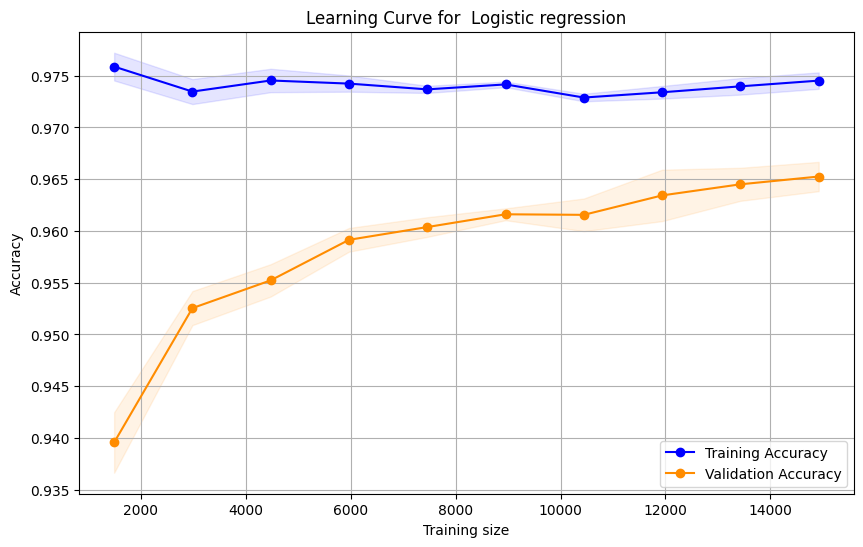

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import string

# Define the learning curve function
def plot_learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="darkorange")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="darkorange", label="Validation Accuracy")

    plt.xlabel("Training size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve for  Logistic regression")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Combine X_train and X_test to create X
X = pd.concat([X_train, X_test])

# Combine y_train and y_test to create y
y = pd.concat([y_train, y_test])

# Plot the learning curve
plot_learning_curve(pipeline, X, y) # Use the combined X and y

# Effects of the regularizers

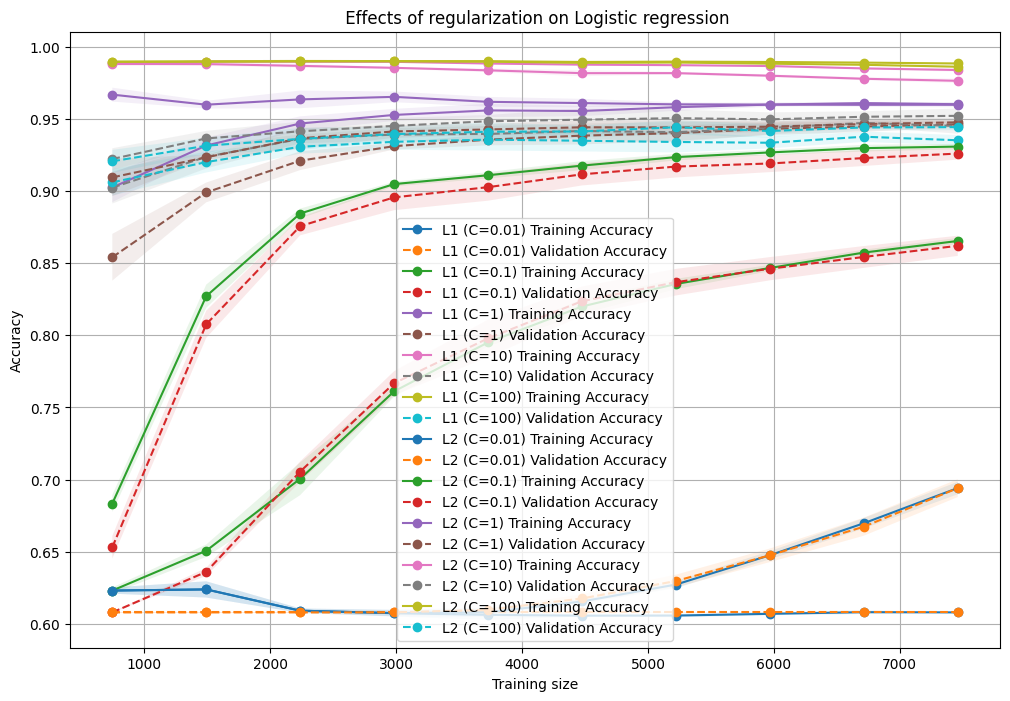

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import string

# Define the learning curve function
def plot_learning_curve(estimator, X, y, ax, label, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    ax.plot(train_sizes, train_scores_mean, 'o-', label=f"{label} Training Accuracy")
    ax.plot(train_sizes, test_scores_mean, 'o--', label=f"{label} Validation Accuracy")

# Define different values for the regularization parameter C
regularization_params = [0.01, 0.1, 1, 10, 100]

# Plot learning curves for L1 and L2 regularization in one graph
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for L1 regularization
for C in regularization_params:
    pipeline_l1 = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=1000, ngram_range=(1, 2))),
        ('clf', LogisticRegression(penalty='l1', solver='liblinear', C=C))
    ])
    plot_learning_curve(pipeline_l1, X, y, ax, label=f'L1 (C={C})')

# Plot for L2 regularization
for C in regularization_params:
    pipeline_l2 = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=1000, ngram_range=(1, 2))),
        ('clf', LogisticRegression(penalty='l2', solver='liblinear', C=C))
    ])
    plot_learning_curve(pipeline_l2, X, y, ax, label=f'L2 (C={C})')

ax.set_xlabel("Training size")
ax.set_ylabel("Accuracy")
ax.set_title(" Effects of regularization on Logistic regression")
ax.legend(loc="best")
ax.grid()
plt.show()

# Accuracy, Precision, Recall, f1-score

In [3]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Safe Email', 'Phishing Email'])

print(report)

                precision    recall  f1-score   support

    Safe Email       0.98      0.97      0.97      2273
Phishing Email       0.96      0.96      0.96      1457

      accuracy                           0.97      3730
     macro avg       0.97      0.97      0.97      3730
  weighted avg       0.97      0.97      0.97      3730



# Confusion Metrix

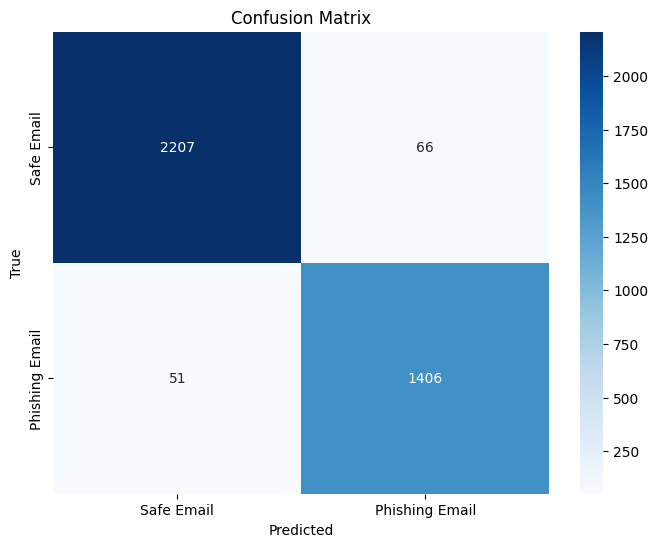

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe Email', 'Phishing Email'], yticklabels=['Safe Email', 'Phishing Email'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# AUC ROC

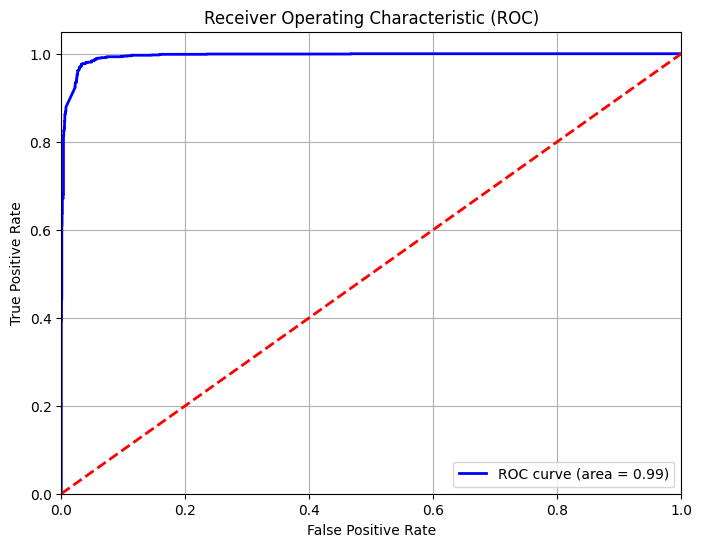

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# CPU RAM

In [9]:
import psutil

# Get CPU usage
cpu_usage = psutil.cpu_percent()
print(f'CPU Usage: {cpu_usage}%')

# Get memory usage
memory_info = psutil.virtual_memory()
print(f'Total Memory: {memory_info.total} bytes')
print(f'Used Memory: {memory_info.used} bytes')
print(f'Free Memory: {memory_info.available} bytes')

# Get GPU information (if available)
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

CPU Usage: 42.9%
Total Memory: 13609426944 bytes
Used Memory: 2119479296 bytes
Free Memory: 11154853888 bytes


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6112122611319705137
 xla_global_id: -1]